In [3]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [4]:
# Inlezen van CSV-bestand
dataPositions = pd.read_csv('../data/positions_xyz_60px_full.csv')
dataCoordinates = pd.read_csv('../data/red_ball_coordinates_60px_full.csv')

# X zijn de 14 inputs, en y zijn de 3 outputs
y = dataPositions.values
X = dataCoordinates.values

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (9347, 14)
Shape of y: (9347, 3)


In [5]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=4)
dfX = imputer.fit_transform(X)
dfy = imputer.fit_transform(y)

In [6]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(dfX, dfy, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_val_scaled = scaler_y.transform(y_val)
y_test_scaled = scaler_y.transform(y_test)

In [7]:
model = MLPRegressor(hidden_layer_sizes=(100, ), max_iter=28000, random_state=42)

model.fit(X_train_scaled, y_train_scaled)

MLPRegressor(max_iter=28000, random_state=42)

In [8]:
y_val_pred_scaled = model.predict(X_val_scaled)
y_val_pred = scaler_y.inverse_transform(y_val_pred_scaled)

mse_val = mean_squared_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print(f"MSE on validation set: {mse_val}")
print(f"MAE on validation set: {mae_val}")
print(f"R2-score on validation set: {r2_val}")

MSE on validation set: 0.026185292605250182
MAE on validation set: 0.10485922160640286
R2-score on validation set: 0.9943060170976397


In [9]:
y_test_pred_scaled = model.predict(X_test_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"MSE on validation set: {mse_test}")
print(f"MAE on validation set: {mae_test}")
print(f"R2-score on validation set: {r2_test}")

MSE on validation set: 0.021560093599540323
MAE on validation set: 0.09874573286248918
R2-score on validation set: 0.9954578558998636


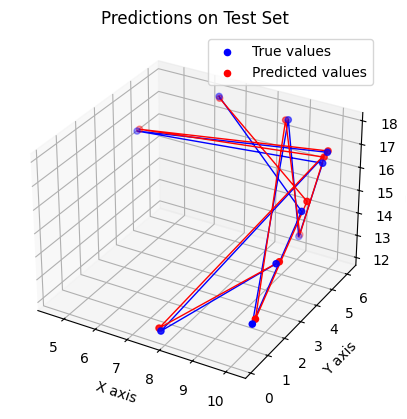

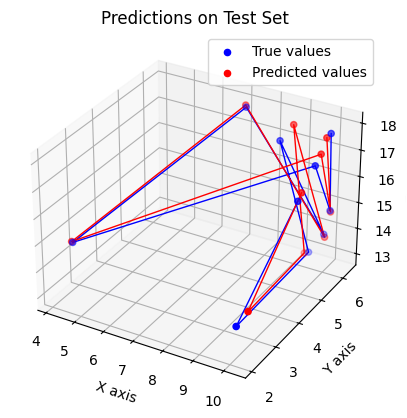

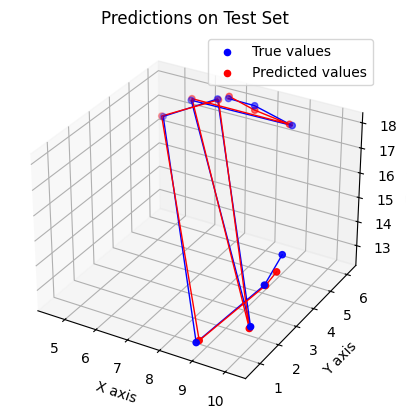

In [11]:
from utils.plot_maker_gaussian_process import plot_maker_3d

plot_maker_3d(y_test, y_test_pred, "Predictions on Test Set")
plot_maker_3d(y_test[1000:1100], y_test_pred[1000:1100], "Predictions on Test Set")
plot_maker_3d(y_test[1500:1550], y_test_pred[1500:1550], "Predictions on Test Set")
